$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [4]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code to compute step length
  step_length=(np.dot(gradf.T,gradf)) / (np.matmul(np.matmul(gradf,2*A),gradf)) 
  
  return step_length

In [5]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  p=rho
  y=gamma
  #implement the backtracking line search
  while evalf(x+alpha*(-gradf)) > evalf(x)-y*alpha*np.dot((gradf.T),gradf):
    alpha=p*alpha


  #print('final step length:',alpha)
  return alpha

In [6]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [7]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x ,k


#Que.3

In [8]:

my_start_x = np.array([1,1])
my_tol= 1e-5


x_opt,iterations = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print(f'Value of optimizer for constant step length= {x_opt} and minimum value is= {evalf(x_opt)} ')

#check what happens when you call find_minimzer using backtracking line search
x_opt_bls,iterations = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print(f"Value of optimizer for Backtracking line search ={x_opt_bls} and minimum value is= {evalf(x_opt_bls)}")


Value of optimizer for constant step length= [  7.99999775 -11.99999582] and minimum value is= 2.2517218946096954e-11 
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
Value of optimizer for Backtracking line search =[  8. -12.] and minimum value is= 0.0


#Que.4

In [9]:
my_start_x = np.array([25,25])
my_tol= 1e-12
x_opt,iterations = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print(f'Value of optimizer for exact step length= {x_opt}, minimum value is= {evalf(x_opt)} and number of iterations= {iterations} ')


Value of optimizer for exact step length= [  8. -12.], minimum value is= 0.0 and number of iterations= 1 


In [10]:
my_start_x = np.array([25,25])
my_tol= 1e-12
x_opt_bls,iterations = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print(f"Value of optimizer for Backtracking line search ={x_opt_bls}, minimum value is= {evalf(x_opt_bls)} and number of iterations are= {iterations}")

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
Value of optimizer for Backtracking line search =[  8. -12.], minimum value is= 0.0 and number of iterations are= 1


In both methods no of iterations taken by method is equal and equal to 1

#Que.5

In [11]:
my_start_x=np.array([25,25])
my_tol=10**(-10)
list_of_alpha=[1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
no_of_iterations=[]
list_of_opt=[]
list_of_minimum_value=[]
for a in list_of_alpha:
  print(f"\nFor alpha = {a}")
  x_opt_bls,iterations = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, a, 0.5,0.5)
  print(f"Value of optimizer is= {x_opt_bls}, minimum value is= {evalf(x_opt_bls)} and number of iterations are= {iterations}")
  no_of_iterations.append(iterations)
  list_of_opt.append(x_opt_bls)
  list_of_minimum_value.append(evalf(x_opt_bls))



For alpha = 1
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 0.0 and number of iterations are= 1

For alpha = 0.9
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 1.6579714975258972e-21 and number of iterations are= 12

For alpha = 0.75
Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 1.3714654556129199e-21 and number of iterations are= 20

For alpha = 0.6
Params for Backtracking LS: alpha start: 0.6 rho: 0.5  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 2.2038291998576117e-21 and number of iterations are= 30

For alpha = 0.5
Params for Backtracking LS: alpha start: 0.5 rho: 0.5  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 0.0 and number of iterations are= 1

For alpha = 0.4
Params for Backtracking LS: alpha start: 0.4 rho: 0.5  gamma

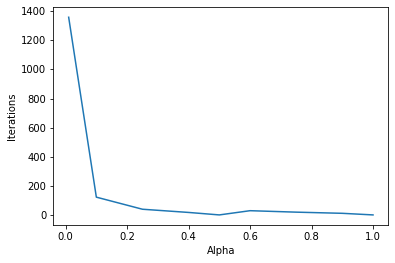

In [12]:
import matplotlib.pyplot as plt
plt.plot(list_of_alpha,no_of_iterations)
plt.ylabel('Iterations')
plt.xlabel('Alpha')
plt.show()

As we decrease the value of alpha from 1 to 0.5 the number of iterations increases,but at alpha= 1 and 0.5 the number of iteration is 1 and after this if we decrease the value of alpha from 0.5 to 0.01 the number of iterations increases. for alpha equal to 1 and 0.5, the number of iteration is 1 it means that these two values are the most suitable values.
for each value of the alpha the minimum value of the function is approaching to zero.

As we have calculated above the exact line search method is taking 1 iteration to terminate and for alpha= 0.5 and 1 the backtracking algorithm is taking 1 iteration to terminate,and for other values of alpha backtracking algorithm is taking more iterations. hence we can conclude that the exact line search is faster algorithm but it can't be used for general purposes.

#Que.6

In [13]:
my_start_x=np.array([25,25])
my_tol=10**(-10)
list_of_rho=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
no_of_iterations=[]
list_of_opt=[]
list_of_minimum_value=[]
for r in list_of_rho:
  print(f"\nFor rho = {r}")
  x_opt_bls,iterations = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, r,0.5)
  print(f"Value of optimizer is= {x_opt_bls}, minimum value is= {evalf(x_opt_bls)} and number of iterations are= {iterations}")
  no_of_iterations.append(iterations)
  list_of_opt.append(x_opt_bls)
  list_of_minimum_value.append(evalf(x_opt_bls))


For rho = 0.9
Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 4.960536411900771e-22 and number of iterations are= 9

For rho = 0.75
Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 1.0819468296335504e-21 and number of iterations are= 15

For rho = 0.6
Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 7.844395544174143e-22 and number of iterations are= 22

For rho = 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 0.0 and number of iterations are= 1

For rho = 0.4
Params for Backtracking LS: alpha start: 1 rho: 0.4  gamma: 0.5
Value of optimizer is= [  8. -12.], minimum value is= 1.1393259623274523e-22 and number of iterations are= 18

For rho = 0.25
Params for Backtracking LS: alpha start: 1 rho: 0.25  gamma:

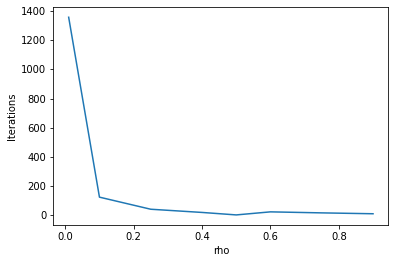

In [14]:
plt.plot(list_of_rho,no_of_iterations)
plt.ylabel('Iterations')
plt.xlabel('rho')
plt.show()

As we decrease the value of rho from 0.9 to 0.5 the number of iterations increases but at rho=0.5 the number of iterations is 1 and after this if we decrease the value of rho from 0.5 to 0.01 the number of iterations increases. At rho= 0.5 the number of iteration is 1 it means that it is the more suitable value for this method. and for each value of rho the minimum value of the function is approaching to zero.

As we have calculated above the exact line search method is taking 1 iteration to terminate and for rho=0.5 the backtracking algorithm is also taking 1 iteration to terminate,and for other values of rho backtracking algorithm is taking more iterations. hence we can conclude that the exact line search is faster algorithm but it can't be used for general purposes.